In [1]:
# This notebook requires scikit-learn version 0.23.1 or later for some features.
# If you are using Google Colab, uncomment the line below, run it, and restart runtime.

# !pip install --upgrade scikit-learn

## Machine Learning Pipelines and Automated Hyperparameter Tuning

### [Fred Feng](http://umich.edu/~fredfeng/) (fredfeng@umich.edu)

### University of Michigan-Dearborn

***

### Prerequisites

- #### Some familiarity with Python and its common libraries 
    - #### numpy, pandas
    - #### [Introduction to Data Analysis in Python](https://youtu.be/7IsFmtvBOyc) workshop


- #### Basic understanding of machine learning models (logistic regression)


### Goal of this talk

- #### Give you a taste of using machine learning pipeline and hyperparameter tuning with scikit-learn.


### [Scikit-learn](https://scikit-learn.org/)

- #### A machine learning library in Python
- #### Open source and free
- #### Implemented a large number of common machine learning models
- #### Clean, uniform, and streamlined API
- #### Widely used across [industries](https://scikit-learn.org/stable/testimonials/testimonials.html) and academia


### What scikit-learn is *not* for

- #### In-depth statistical analysis, hypothesis testing

  - #### [StatsModels](https://www.statsmodels.org/)

- #### Deep learning, reinforcement learning

  - #### Karas (TensorFlow), PyTorch


***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1. Read in and explore the data. 

### Bank customer data for a marketing campaign [(Data source)](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [3]:
url = 'http://umich.edu/~fredfeng/workshops/bank.csv'

df = pd.read_csv(url)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19.0,oct,79,1.0,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11.0,may,220,NaN,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,NaN,apr,185,1.0,330,1,failure,0
3,30,management,NaN,tertiary,no,1476,yes,yes,unknown,3.0,jun,199,4.0,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5.0,may,226,1.0,-1,0,unknown,0


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
4516,33,services,married,secondary,no,-333,yes,no,cellular,30.0,jul,329,5.0,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9.0,may,153,1.0,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19.0,aug,151,11.0,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6.0,feb,129,4.0,211,3,other,0
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3.0,apr,345,2.0,249,7,other,0


In [5]:
df.shape

(4521, 17)

In [6]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day           float64
month          object
duration        int64
campaign      float64
pdays           int64
previous        int64
poutcome       object
subscribed      int64
dtype: object

In [7]:
df.isnull().sum()

age           0
job           0
marital       1
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           1
month         0
duration      0
campaign      1
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

### Our goal is to develop a model that predicts whether a customer will subscribe the service or not.

In [8]:
df['subscribed'].value_counts()

0    4000
1     521
Name: subscribed, dtype: int64

In [9]:
df.groupby('subscribed').mean()

,age,balance,day,duration,campaign,pdays,previous
subscribed,,,,,,,
0,40.998000,1403.211750,15.948737,226.347500,2.862716,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


## Part 2. A logistic regression model with a few numerical features

### Step 1. Specifying what features to include by constructing a <font color="red">feature matrix</font>

In [10]:
X = df[['age', 'balance', 'duration']]

X.head()

,age,balance,duration
0,30,1787,79
1,33,4789,220
2,35,1350,185
3,30,1476,199
4,59,0,226


### Step 2. Specify the target (i.e., the output of the model)

In [11]:
y = df['subscribed']

y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: subscribed, Length: 4521, dtype: int64

###  A golden rule: <font color="red">Models should never be tested on the same data they were trained on.</font>

### Step 3. Split the data to a <font color="green">train set</font> and a <font color="DarkViolet">test set</font>

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=99, 
                                                    stratify=y
                                                   )

X_test.head()

,age,balance,duration
118,39,52,69
4275,53,15,921
1074,28,594,54
1157,55,23,123
1276,41,5037,252


In [13]:
y_test.head()

118     0
4275    1
1074    0
1157    0
1276    1
Name: subscribed, dtype: int64

### Step 4. Instantiate the [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

### Step 5. Train the model by appying the `fit()` method based on the <font color="green">train set</font>

In [15]:
clf.fit(X_train, y_train)

LogisticRegression()

In [16]:
print('Coefficients:', clf.coef_, '\nIntercept:', clf.intercept_)

Coefficients: [[8.79752863e-03 1.85809349e-05 3.48262038e-03]] 
Intercept: [-3.63227161]


### Step 6. Make predictions from the trained model for the <font color="DarkViolet">test set</font>

In [17]:
y_pred = clf.predict(X_test)

### Step 7. Evaluate the model by comparing the predictions with the target in the <font color="DarkViolet">test set</font>

In [18]:
np.column_stack((y_test, y_pred))[:10]

array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

#### Confusion matrix

In [19]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

cm

# pd.DataFrame(data=cm, 
#              columns=['predict: 0', 'predict: 1'], 
#              index=['true: 0', 'true: 1'])

array([[791,  10],
       [ 89,  15]])

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.8906077348066298

In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       801
           1       0.60      0.14      0.23       104

    accuracy                           0.89       905
   macro avg       0.75      0.57      0.59       905
weighted avg       0.86      0.89      0.86       905



#### ROC curve

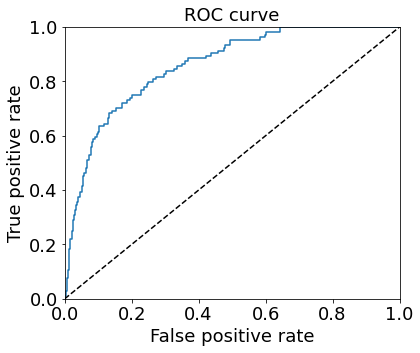

In [22]:
from sklearn.metrics import roc_curve

y_pred_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

fontsize = 18
plt.xlabel('False positive rate', fontsize=fontsize)
plt.ylabel('True positive rate', fontsize=fontsize)
plt.title('ROC curve', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

### Cross-validation

![k-fold cross validataion](https://miro.medium.com/max/3115/1*me-aJdjnt3ivwAurYkB7PA.png)

[Image source](https://medium.com/@sebastiannorena/some-model-tuning-methods-bfef3e6544f0)

In [23]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

# cv = KFold(n_splits=5, shuffle=True)

# cv = KFold(n_splits=5, shuffle=True, random_state=99)

for k in cv.split(X[:15]):
    print(k)

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([0, 1, 2]))
(array([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([3, 4, 5]))
(array([ 0,  1,  2,  3,  4,  5,  9, 10, 11, 12, 13, 14]), array([6, 7, 8]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 12, 13, 14]), array([ 9, 10, 11]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([12, 13, 14]))


In [24]:
# for small or unbalanced data it's better to use stratified cross-validation

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=88)

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=cv, scoring='roc_auc')

array([0.8085    , 0.80513221, 0.68072115, 0.80382212, 0.80555288])

### Lastly, we can use the model to make predictions for out-of-sample data

In [26]:
X_new = pd.DataFrame(data=[[43, 3285, 1721], 
                           [58, 5920, 255]],
                     columns=X.columns, 
                     index=['Tom', 'Jerry'])

X_new

,age,balance,duration
Tom,43,3285,1721
Jerry,58,5920,255


In [27]:
clf.predict(X_new)

array([1, 0])

## Part 3. Feature preprocessing

In [28]:
X = df[['marital', 'day', 'duration', 'campaign', 'previous']]

In [29]:
X['marital'].value_counts()

married     2796
single      1196
divorced     528
Name: marital, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=99, 
                                                    stratify=y)

X_test.head()

,marital,day,duration,campaign,previous
118,married,13.0,69,1.0,0
4275,married,20.0,921,2.0,0
1074,divorced,18.0,54,3.0,0
1157,married,13.0,123,2.0,0
1276,divorced,23.0,252,9.0,5


### Preprocessing: [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)

- ### Almost all real world data sets contain missing values.

- ### If we discard the row if it contains any missing values, we may end up losing a lot of data that may be valuable.

- ### A better strategy is to impute the missing values.


### Missing <font color="red">numerical</font> values can be imputed with the mean (by default) or median of the column.

In [31]:
X.isnull().sum() 

marital     1
day         1
duration    0
campaign    1
previous    0
dtype: int64

In [32]:
X[['day', 'campaign']].head()

,day,campaign
0,19.0,1.0
1,11.0,NaN
2,NaN,1.0
3,3.0,4.0
4,5.0,1.0


In [33]:
X[['day', 'campaign']].mean()

day         15.915265
campaign     2.794027
dtype: float64

In [34]:
from sklearn.impute import SimpleImputer

SimpleImputer().fit_transform(X[['day', 'campaign']])[:5]

array([[19.        ,  1.        ],
       [11.        ,  2.79402655],
       [15.91526549,  1.        ],
       [ 3.        ,  4.        ],
       [ 5.        ,  1.        ]])

### Missing <font color="red">categorical</font> values can be imputed with the <font color="green">most frequent</font> of the column.

In [35]:
X['marital'].head()

0    married
1    married
2     single
3        NaN
4    married
Name: marital, dtype: object

In [63]:
X['marital'].value_counts()

married     2796
single      1196
divorced     528
Name: marital, dtype: int64

In [37]:
marital_imputed = SimpleImputer(strategy='most_frequent').fit_transform(X[['marital']])

marital_imputed[:5]

array([['married'],
       ['married'],
       ['single'],
       ['married'],
       ['married']], dtype=object)

### Preprocessing: Encode categorical features using [One Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [38]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

enc.fit_transform(marital_imputed)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [39]:
enc.categories_

[array(['divorced', 'married', 'single'], dtype=object)]

### Preprocessing: Scale the features

### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): scale a feature to zero mean and unit variance

### [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html): scale a feature to a given range (from 0 to 1 by default)

In [40]:
X['duration'].head()

0     79
1    220
2    185
3    199
4    226
Name: duration, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

StandardScaler().fit(X[['duration']]).transform(X[['duration']])

array([[-0.7118608 ],
       [-0.16919389],
       [-0.30389844],
       ...,
       [-0.43475429],
       [-0.51942573],
       [ 0.3118938 ]])

In [42]:
StandardScaler().fit_transform(X[['duration']])

array([[-0.7118608 ],
       [-0.16919389],
       [-0.30389844],
       ...,
       [-0.43475429],
       [-0.51942573],
       [ 0.3118938 ]])

In [43]:
MinMaxScaler().fit_transform(X[['duration']])

array([[0.02482622],
       [0.0714995 ],
       [0.05991394],
       ...,
       [0.04865938],
       [0.04137703],
       [0.11287653]])

### [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html): Constructs a transformer from a custom function.

### Here we make a logarithm transformation based on the  numpy [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html) function.

In [44]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p)

log_transformer.fit_transform(df[['duration']])

,duration
0,4.382027
1,5.398163
2,5.225747
3,5.298317
4,5.424950
...,...
4516,5.799093
4517,5.036953
4518,5.023881
4519,4.867534


## Part 4. Machine learning pipelines

<img src="https://cdn.pixabay.com/photo/2014/10/30/23/04/pressure-water-line-509871_1280.jpg" alt="pipeline" style="width: 600px;"/>

<br>

<img src="https://github.com/frfeng/sklearn-tutorial/raw/main/pipeline.png" alt="pipeline" style="width: 600px;"/>

### Why pipelines?

- ### It simplifies and automates the machine learning workflow.

- ### Separation of concerns: it separates the workflow into modular and reusable parts.

- ### It makes it harder to make mistakes.

    - ### Ensure the same preprocessings being used for the train, test, and out-of-sample data

### "*If you are not using a pipeline, you are probably doing it wrong.*"

***

### Let's do the following preprocessings

- ### "marital" column: imputation -> one-hot encoding
- ### "duration" column: log tranformation 
- ### "day" & "campaign" column: imputation -> standardization

### A [column transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html#sklearn.compose.make_column_transformer) allows different columns to be transformed separately in parallel. 

<img src="https://cdn.pixabay.com/photo/2020/05/08/16/37/pipes-5146458_1280.jpg" alt="pipeline" style="width: 600px;"/>

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

imp_ohe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                        OneHotEncoder(sparse=False)
                       )

imp_std = make_pipeline(SimpleImputer(), 
                        StandardScaler()
                       )

preprocessor = make_column_transformer((imp_ohe, ['marital']),
                                       (FunctionTransformer(np.log1p), ['duration']),
                                       (imp_std, ['day', 'campaign']), 
                                        remainder='passthrough')

### A [column selector](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html) allows selecting columns by data type or name pattern. 

### It can be useful when the data contains many features.

In [46]:
from sklearn.compose import make_column_selector

preprocessor = make_column_transformer((imp_ohe, make_column_selector(dtype_include=object)),
                                       (FunctionTransformer(np.log1p), ['duration']),
                                       (imp_std, ['day', 'campaign']), 
                                        remainder='passthrough')

In [47]:
X_train.head()

,marital,day,duration,campaign,previous
543,married,6.0,73,1.0,0
2692,married,30.0,521,3.0,7
1767,single,15.0,415,4.0,1
604,married,17.0,71,1.0,0
4413,married,16.0,622,1.0,1


In [48]:
X_train.dtypes

marital      object
day         float64
duration      int64
campaign    float64
previous      int64
dtype: object

In [65]:
np.set_printoptions(edgeitems=10, suppress=True)
preprocessor.fit_transform(X_train).round(3)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.   ,  1.   ,  0.   ,  4.304, -1.208, -0.574,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  6.258,  1.7  ,  0.066,  7.   ],
       [ 0.   ,  0.   ,  1.   ,  6.031, -0.117,  0.386,  1.   ],
       [ 0.   ,  1.   ,  0.   ,  4.277,  0.125, -0.574,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  6.435,  0.004, -0.574,  1.   ],
       [ 0.   ,  0.   ,  1.   ,  5.407,  0.246, -0.574,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  5.209,  0.367,  2.625,  0.   ],
       [ 1.   ,  0.   ,  0.   ,  6.867, -0.238,  0.066,  7.   ],
       [ 0.   ,  1.   ,  0.   ,  4.554, -1.208,  1.346,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  4.025,  0.488, -0.254,  0.   ],
       ...,
       [ 0.   ,  0.   ,  1.   ,  5.209,  0.367,  1.666,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  5.03 ,  1.336,  2.625,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  5.429,  1.458, -0.574,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  5.112,  1.579,  6.464,  0.   ],
       [ 1.   ,  0.   ,  0.   ,  5.361, -1.329, -0.574,  0.   ],
       [ 0.  

In [1]:
pipe = make_pipeline(preprocessor, clf)

pipe.fit(X_train, y_train)

NameError: ignored

### Visualize a pipeline

In [51]:
from sklearn import set_config
set_config(display='diagram')

pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f82fa5df880>),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['duration']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['day', 'campaign'])])),
                ('logisticregression', LogisticRegression())])

### Use the pipeline to make predictions for out-of-sample data

In [52]:
X_new = pd.DataFrame(data=[['single', 20, 16, 5, 4], 
                           ['married', 7, 352, 2, 0]],
                     columns=X.columns, 
                     index=['Tom', 'Jerry'])

X_new

,marital,day,duration,campaign,previous
Tom,single,20,16,5,4
Jerry,married,7,352,2,0


In [53]:
pipe.predict(X_new)

array([0, 0])

### Cross-validation with a pipeline

In [54]:
cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

array([0.82972619, 0.78903846, 0.8702524 , 0.85139423, 0.82487981])

### Now let's try another classification model [k-nearest neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [55]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [56]:
pipe = make_pipeline(preprocessor, clf) # we reuse the same preprocessor from earlier

pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f82fa5df880>),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['duration']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['day', 'campaign'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [57]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f82fa5df880>),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['duration']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['day', 'campaign'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [58]:
cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

array([0.71895238, 0.7132512 , 0.70444111, 0.66038462, 0.6334976 ])

### Hyperparameter tuning using [grid search cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f82fa5df880>),
                                   ('functiontransformer',
                                    FunctionTransformer(func=<ufunc 'log1p'>),
                                    ['duration']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                   

In [61]:
param_grid = {
    'columntransformer__pipeline-2__standardscaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'columntransformer__pipeline-2__simpleimputer__strategy': ['mean', 'median'],
    'kneighborsclassifier__n_neighbors': [3, 5, 7], 
    'kneighborsclassifier__metric': ['euclidean', 'manhattan'], 
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

In [62]:
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

gs.fit(X_train, y_train)

gs.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'columntransformer__pipeline-2__simpleimputer__strategy': 'mean',
 'columntransformer__pipeline-2__standardscaler': MinMaxScaler(),
 'kneighborsclassifier__metric': 'euclidean',
 'kneighborsclassifier__n_neighbors': 7,
 'kneighborsclassifier__weights': 'distance'}

### In the above example, we set up 

- ### 3 options for the standardization
- ### 2 options for the imputation
- ### 3 options for the number of neighbors in knn
- ### 2 options for the distance metric in knn
- ### 2 options for the weights in knn

### That is a total of $3\times2\times3\times2\times2=72$ model configurations.

### With a 5-fold cross-validation for each, we did a total of $72\times5=360$ model fittings to the data.

***

### Bonus: a summary of scikit-learn's uniform APIs 

- ### scikit-learn's main API is implemented around so-called estimators.

- ### An estimator is any object that learns from data (e.g., a regression or classification model, or a transformer such as a scaler).

<br>

- ### Fit estimator to data: `estimator.fit(X, [y])`
- ### Transform data using fitted estimator: `estimator.transform(X)`
    - ### e.g., preprocessing, dimentionality reduction
- ### Predict using fitted estimator: `estimator.predict(X)`
    - ### e.g., regression, classification, clustering

### Resources from scikit-learn official website

- ### [Examples](https://scikit-learn.org/stable/auto_examples/index.html)

- ### [Tutorials](https://scikit-learn.org/stable/tutorial/index.html)

- ### [User guide](https://scikit-learn.org/stable/user_guide.html)

- ### [scikit-learn MOOC course](https://inria.github.io/scikit-learn-mooc/)
